In [13]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

symbol = '^N225'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-12-19 00:00:00+09:00,27257.349609,27339.490234,26106.380859,26235.250000,386800000,0.0,0.0
2022-12-26 00:00:00+09:00,26299.539062,26620.490234,25953.919922,26094.500000,274800000,0.0,0.0
2023-01-02 00:00:00+09:00,25834.929688,26034.060547,25661.890625,25973.849609,223800000,0.0,0.0
2023-01-09 00:00:00+09:00,26176.609375,26547.609375,26090.839844,26119.519531,308900000,0.0,0.0
2023-01-16 00:00:00+09:00,25836.669922,26816.679688,25748.099609,26553.529297,362300000,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-18 00:00:00+09:00,38259.589844,38560.101562,37945.210938,38283.851562,523900000,0.0,0.0
2024-11-25 00:00:00+09:00,38679.929688,39053.640625,37801.621094,38208.031250,641400000,0.0,0.0
2024-12-02 00:00:00+09:00,38216.949219,39632.300781,37958.550781,39091.171875,589700000,0.0,0.0


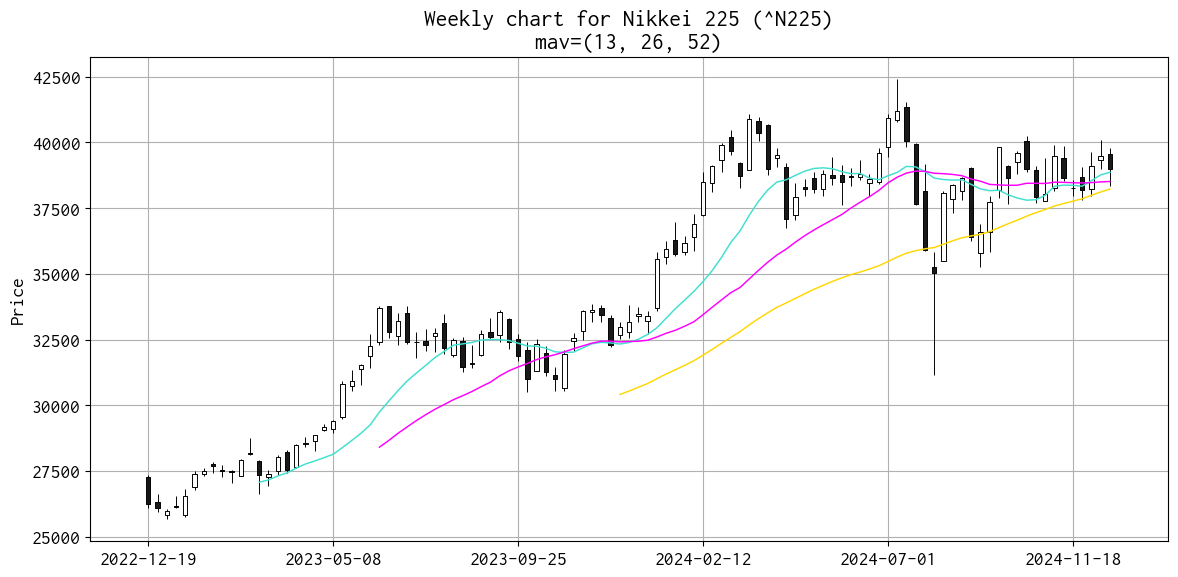

In [14]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 14

fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

mpf.plot(
    df, type='candle', style='default',
    mav=(13, 26, 52),
    volume=False,
    datetime_format='%Y-%m-%d',
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s (%s)\nmav=(13, 26, 52)' %(ticker.info['longName'], symbol))
ax.grid()

plt.tight_layout()
plt.savefig('weekly_chart_n225.png')
plt.show()

In [15]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-09 00:00:00+09:00,39332.550781,40091.550781,38972.781250,39470.441406,574200000,0.0,0.0
2024-12-16 00:00:00+09:00,39551.218750,39796.218750,38355.519531,39001.890625,483100000,0.0,0.0


In [8]:
df.tail(2)['Close']

Date
2024-12-09 00:00:00+09:00    39470.441406
2024-12-16 00:00:00+09:00    38962.628906
Name: Close, dtype: float64

In [9]:
df.tail(2)['Close'].diff()

Date
2024-12-09 00:00:00+09:00         NaN
2024-12-16 00:00:00+09:00   -507.8125
Name: Close, dtype: float64

In [10]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2024-12-16 00:00:00+09:00   -588.589844
dtype: float64

In [11]:
df['Close'].rolling(26).mean()

Date
2022-12-19 00:00:00+09:00             NaN
2022-12-26 00:00:00+09:00             NaN
2023-01-02 00:00:00+09:00             NaN
2023-01-09 00:00:00+09:00             NaN
2023-01-16 00:00:00+09:00             NaN
                                 ...     
2024-11-18 00:00:00+09:00    38467.468149
2024-11-25 00:00:00+09:00    38456.704026
2024-12-02 00:00:00+09:00    38472.367188
2024-12-09 00:00:00+09:00    38497.593450
2024-12-16 00:00:00+09:00    38511.676532
Name: Close, Length: 105, dtype: float64

In [12]:
df['Close'].rolling(52).mean()

Date
2022-12-19 00:00:00+09:00             NaN
2022-12-26 00:00:00+09:00             NaN
2023-01-02 00:00:00+09:00             NaN
2023-01-09 00:00:00+09:00             NaN
2023-01-16 00:00:00+09:00             NaN
                                 ...     
2024-11-18 00:00:00+09:00    37765.196740
2024-11-25 00:00:00+09:00    37857.052885
2024-12-02 00:00:00+09:00    37987.501202
2024-12-09 00:00:00+09:00    38112.499099
2024-12-16 00:00:00+09:00    38223.914062
Name: Close, Length: 105, dtype: float64